In [1]:
import webbpsf

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-062 CANNOT BE CHECKED AGAINST ONLINE VERSION


In [2]:
nrc = webbpsf.NIRCam()
nrc.filter='F200W'

nrc.detector = 'NRCA2'
nrc.detector_position = (1024,1024)

iterating query, tdelta=3.0

MAST OPD query around UTC: 2023-10-12T00:00:00.000
                        MJD: 60229.0

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2023101004-NRCA3_FP1-1.fits
	Date (MJD):	 60226.9562
	Delta time:	 -2.0438 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/R2023101202-NRCA3_FP1-1.fits
	Date (MJD):	 60229.2870
	Delta time:	 0.2870 days
User requested choosing OPD time closest in time to 2023-10-12T00:00:00.000, which is R2023101202-NRCA3_FP1-1.fits, delta time 0.287 days
Importing and format-converting OPD from /Users/wbalmer/JWST-HCI/webbpsf-data/MAST_JWST_WSS_OPDs/R2023101202-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point


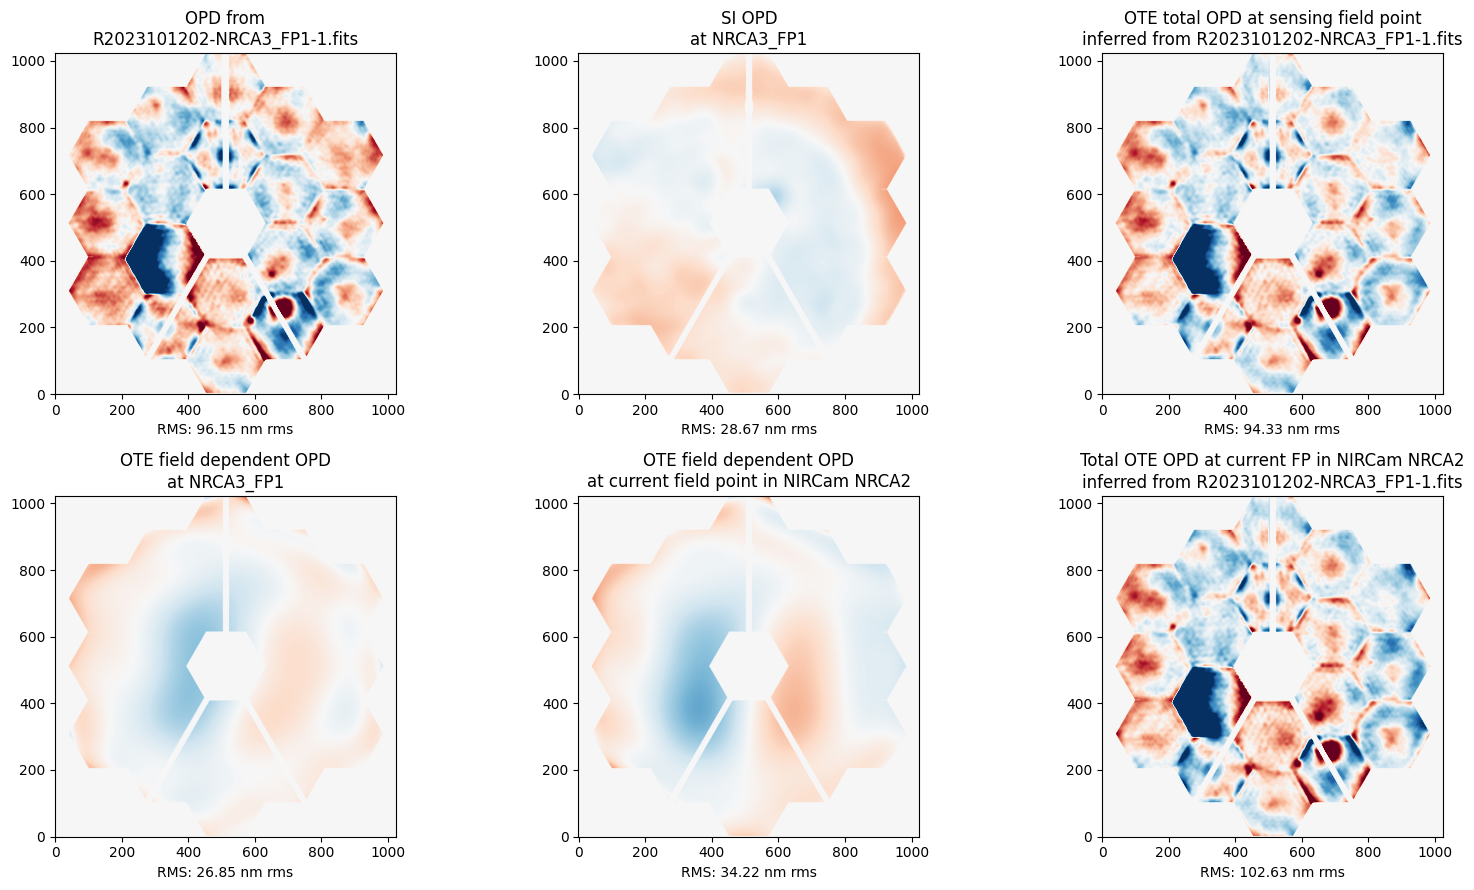

In [3]:
nrc.load_wss_opd_by_date('2023-10-12T00:00:00',plot=True)

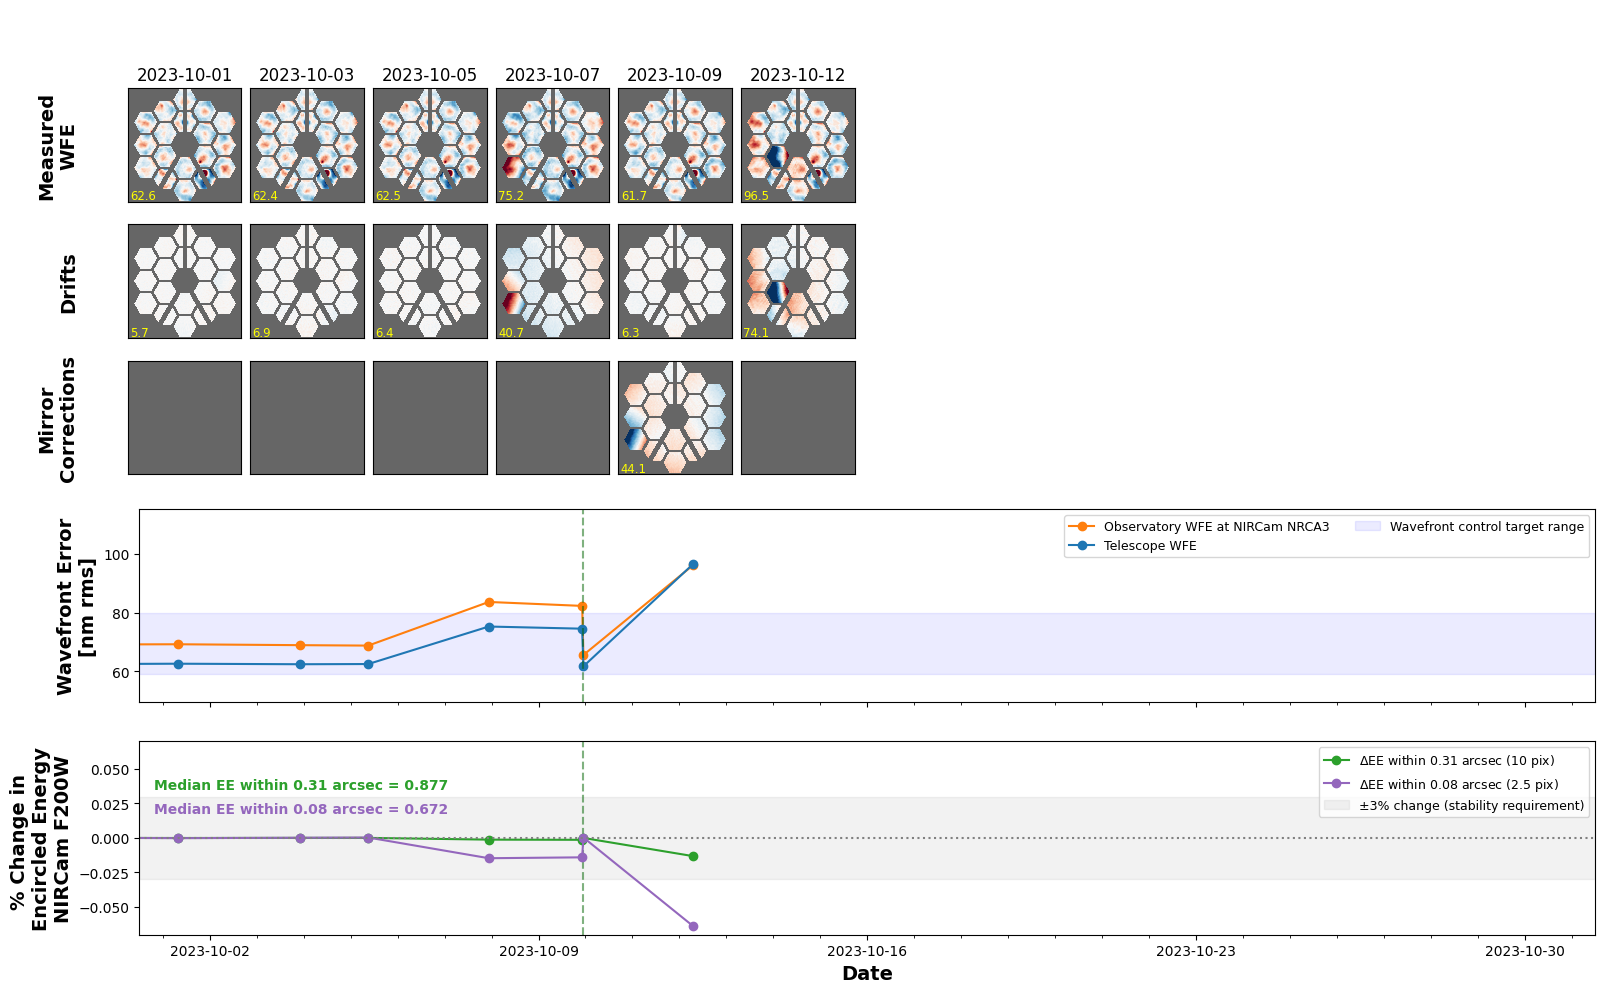

In [4]:
trend_table = webbpsf.trending.monthly_trending_plot(2023, 10, verbose=False)

In [6]:
import astropy

In [8]:
opdtable = webbpsf.mast_wss.retrieve_mast_opd_table()
opdtable = webbpsf.mast_wss.deduplicate_opd_table(opdtable)
webbpsf.mast_wss.download_all_opds(opdtable)



In [13]:
import matplotlib.pyplot as plt

In [15]:
webbpsf.trending.wavefront_drift_plots?

Signature:
webbpsf.trending.wavefront_drift_plots(
    opdtable,
    start_time,
    end_time,
    verbose=False,
    vmax=100,
    n_per_row=9,
    label_cid=False,
    label_visit=False,
)
Docstring:
Generate plots of wavefront drifts over time.

This plots the natural drift in wavefront of the observatory
(i.e. what it did on its own, not showing corrections).

Parameters
-----------
start_time, end_time : Astropy Time instances
    Start and end times to define the range of OPDs to plot for
verbose : bool
    Print more verbose output
vmax : int
     Maximum value in nanometers for the color stretch of OPDs.
n_per_row : int
    Number of plots per row
label_cid : bool
    Add label for WSS correction ID to each plot
label_visit : bool
    Add label for APT/OSS program and observation number to each plot
File:      /opt/anaconda3/envs/spaceklip2/lib/python3.9/site-packages/webbpsf/trending.py
Type:      function

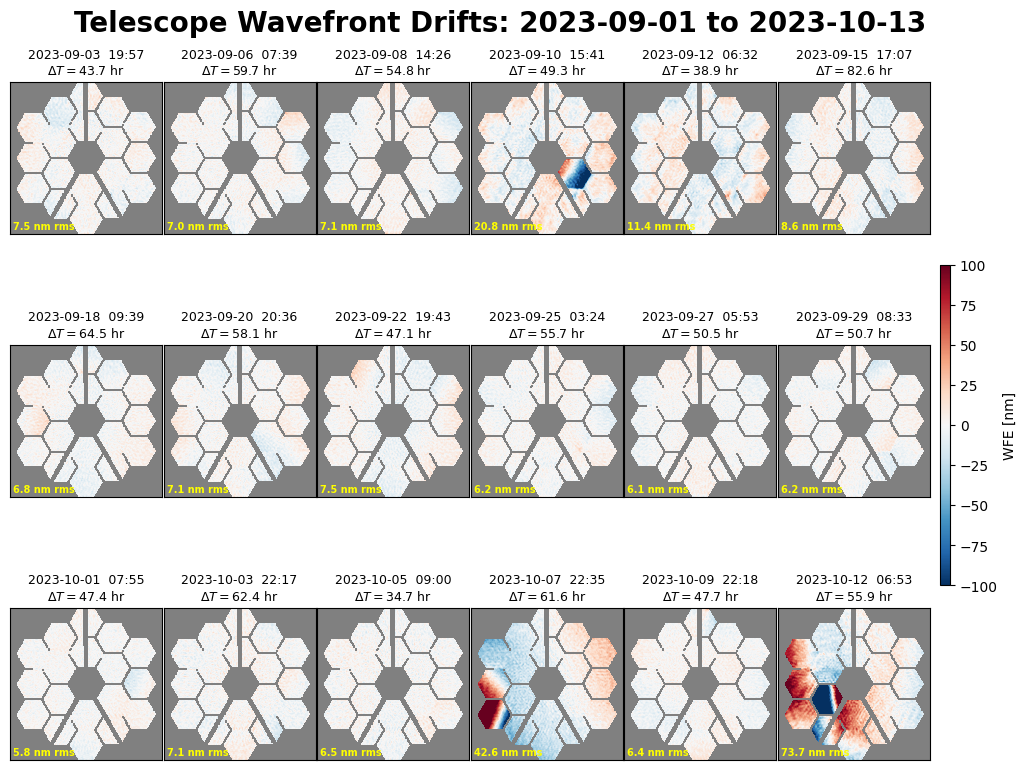

In [32]:
start_time =  astropy.time.Time('2023-09-01T00:00:00')
end_time = astropy.time.Time('2023-10-13T00:00:00')

webbpsf.trending.wavefront_drift_plots(opdtable, start_time=start_time, end_time=end_time, n_per_row=6)
fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.savefig('./OPDs_sept23_oct23.pdf')

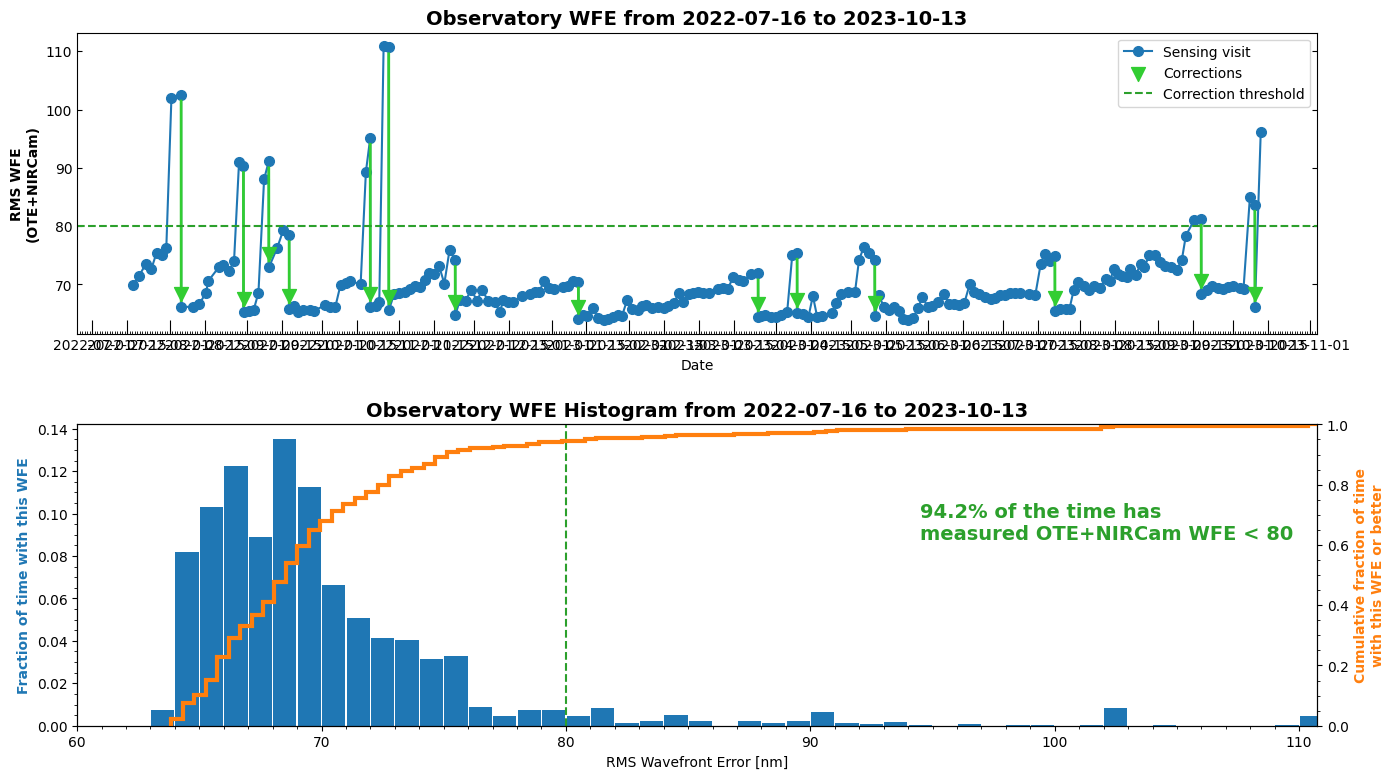

In [35]:
start_time =  astropy.time.Time('2023-09-01')
webbpsf.trending.wfe_histogram_plot(opdtable, thresh=80, mark_corrections='arrows')

plt.savefig('./RMS_over_time.pdf')

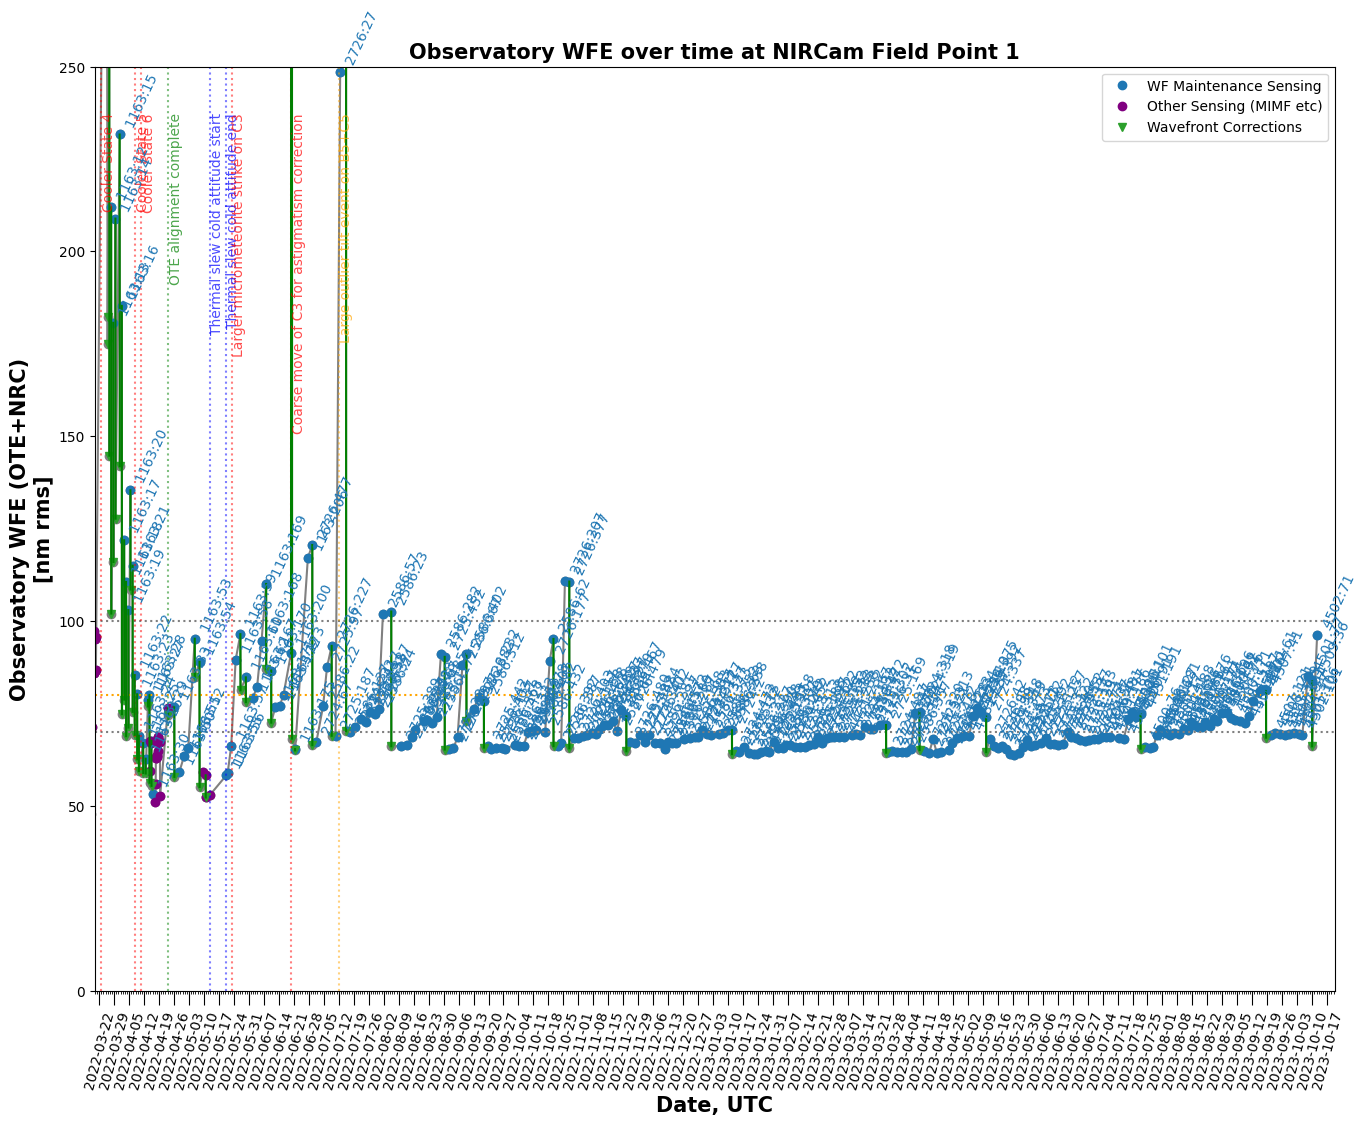

In [33]:
opdtable = webbpsf.mast_wss.retrieve_mast_opd_table()
opdtable = webbpsf.mast_wss.deduplicate_opd_table(opdtable)
webbpsf.mast_wss.download_all_opds(opdtable)

webbpsf.trending.wavefront_time_series_plot(opdtable)



In [36]:
from astropy.io import fits

head = fits.getheader('/Users/wbalmer/JWST-HCI/AFLEP/spaceklip/companions/KL100/JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R-fitpsf_c1.fits')

print(head['SNR'])

3.777643730293562


1.4

In [37]:
head

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ID      =                    1                                                  
RA      =  0.31232292969712605                                                  
RA_ERR  = 0.011184822106021843                                                  
DEC     =  0.05881654418351854                                                  
DEC_ERR = 0.006034253157287268                                                  
FLUX_JY = 0.000216668749965879                                                  
HIERARCH FLUX_JY_ERR = 2.43006959684581E-05                                     
FLUX_SI = 3.34858041281500E-17                                                  
HIERARCH FLUX_SI_ERR = 3.755